In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn
import time
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
rcParams['figure.figsize'] = 20, 12


# Online Resources: 
 - http://philipperemy.github.io/anomaly-detection/
 - http://amunategui.github.io/anomaly-detection-h2o/

# Import H20 as cluster manager:

In [3]:
import h2o
    
# Start H2O on your local machine
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O cluster uptime:,1 min 02 secs
H2O cluster version:,3.10.4.7
H2O cluster version age:,16 days
H2O cluster name:,H2O_from_python_albertomariopirovano_ch0v45
H2O cluster total nodes:,1
H2O cluster free memory:,1.763 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"locked, healthy"
H2O connection url:,http://localhost:54321
H2O connection proxy:,None


In [86]:
X_train = h2o.import_file("../common/albertom/train_test_val_split/X_train.csv")
X_test = h2o.import_file("../common/albertom/train_test_val_split/X_test.csv")
X_val = h2o.import_file("../common/albertom/train_test_val_split/X_val.csv")
y_train = h2o.import_file("../common/albertom/train_test_val_split/y_train.csv")
y_test = h2o.import_file("../common/albertom/train_test_val_split/y_test.csv")
y_val = h2o.import_file("../common/albertom/train_test_val_split/y_val.csv")

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [87]:
X_train = X_train.drop([0])
X_test = X_test.drop([0])
X_val = X_val.drop([0])
y_train = y_train.drop([0])
y_test = y_test.drop([0])
y_val = y_val.drop([0])
X_train = X_train[1:,:]
X_test = X_test[1:,:]
X_val = X_val[1:,:]
y_train = y_train[1:,:]
y_test = y_test[1:,:]
y_val = y_val[1:,:]

y_train = y_train.drop(["C3"])
y_test = y_test.drop(["C3"])
y_val = y_val.drop(["C3"])

In [88]:
print X_train.shape
X_train.head()

(19423, 87)


C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,C15,C16,C17,C18,C19,C20,C21,C22,C23,C24,C25,C26,C27,C28,C29,C30,C31,C32,C33,C34,C35,C36,C37,C38,C39,C40,C41,C42,C43,C44,C45,C46,C47,C48,C49,C50,C51,C52,C53,C54,C55,C56,C57,C58,C59,C60,C61,C62,C63,C64,C65,C66,C67,C68,C69,C70,C71,C72,C73,C74,C75,C76,C77,C78,C79,C80,C81,C82,C83,C84,C85,C86,C87,C88
12.7792,2.01643,2.28468,0.390674,0.390674,0.390674,0.390674,6.76835,6.68088,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
16.8336,16.6681,16.8088,16.6549,16.7557,16.8435,14.4028,6.20157,0,6.01514,5.93159,5.08108,3.29507,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
9.63486,8.49755,8.6398,8.97725,9.01471,9.05125,9.11808,3.70073,4.61646,3.10078,3.10078,3.20088,3.10078,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
8.41682,5.88231,6.13866,6.59427,6.74942,6.64979,6.58052,3.29507,3.90674,3.10078,0,0,2.47415,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
18.7188,11.0353,6.41144,3.44302,5.61061,3.74306,3.78861,6.41144,5.82898,5.61061,3.74306,3.78861,5.93779,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
11.4234,11.368,10.1525,9.90177,9.39592,9.5408,9.45032,3.62821,3.46881,4.4721,4.53579,3.16359,5.73233,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
21.8521,6.36542,6.4235,3.75226,3.87854,3.7768,7.06156,3.82087,0.593159,3.7768,0,7.06156,5.51556,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
13.3609,5.30227,0,9.78578,9.00038,9.29315,0,0,9.78578,4.4721,4.4721,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
24.2783,-1.87188,10.509,21.6245,9.96052,10.3638,10.0233,10.5288,21.7321,9.97712,10.3798,9.78069,6.81852,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
12.1392,4.01936,3.74022,12.0163,11.4602,10.3982,10.4314,0,12.0163,0,3.90674,3.4405,3.90674,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [89]:
print X_test.shape
X_test.head()

(4033, 87)


C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,C15,C16,C17,C18,C19,C20,C21,C22,C23,C24,C25,C26,C27,C28,C29,C30,C31,C32,C33,C34,C35,C36,C37,C38,C39,C40,C41,C42,C43,C44,C45,C46,C47,C48,C49,C50,C51,C52,C53,C54,C55,C56,C57,C58,C59,C60,C61,C62,C63,C64,C65,C66,C67,C68,C69,C70,C71,C72,C73,C74,C75,C76,C77,C78,C79,C80,C81,C82,C83,C84,C85,C86,C87,C88
9.63486,7.65907,8.05178,8.11475,8.14647,8.08156,8.1647,4.4721,3.10078,2.87851,0,3.10078,2.7532,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
17.1773,17.4882,10.7152,8.50277,8.34894,5.37204,0,0,3.90674,3.23542,3.10078,0,10.3025,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
13.3609,13.1594,13.1019,12.024,12.0861,12.1361,11.9403,5.63137,4.20841,4.4721,4.20841,4.4721,3.54951,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
16.8336,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
16.4754,2.32214,0,3.6803,2.38143,3.98899,3.48034,0,3.6803,2.38143,3.98899,3.48034,3.88118,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
9.63486,7.55273,7.73539,0,0,0,0,3.56912,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
20.5244,10.3553,10.3257,10.5841,10.1485,10.3292,10.5031,4.4721,4.7079,4.20841,4.20841,4.20841,3.90674,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
19.2697,18.4123,18.2685,18.8074,18.9006,18.9902,19.1319,0,8.68852,6.32816,6.32816,6.44989,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
14.8572,14.7441,14.7696,13.5347,13.329,13.3739,13.3281,6.19121,0,4.4721,4.4721,4.52125,4.4721,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
9.63486,4.17219,6.97378,8.60263,9.4502,8.86222,6.85064,6.97418,6.89692,6.45061,4.6392,6.85086,6.44607,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [90]:
print X_val.shape
X_val.head()

(3428, 87)


C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,C15,C16,C17,C18,C19,C20,C21,C22,C23,C24,C25,C26,C27,C28,C29,C30,C31,C32,C33,C34,C35,C36,C37,C38,C39,C40,C41,C42,C43,C44,C45,C46,C47,C48,C49,C50,C51,C52,C53,C54,C55,C56,C57,C58,C59,C60,C61,C62,C63,C64,C65,C66,C67,C68,C69,C70,C71,C72,C73,C74,C75,C76,C77,C78,C79,C80,C81,C82,C83,C84,C85,C86,C87,C88
9.63486,8.38288,8.41303,8.69615,9.01789,9.25201,9.3618,4.4721,4.7079,4.4721,4.20841,3.90674,4.4721,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
17.5077,1.47666,1.57481,2.54054,1.43444,0,0,1.57481,2.54054,1.43444,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
12.1392,11.8792,11.9237,12.0132,12.045,11.7446,11.8572,4.0002,5.20872,3.85795,4.26215,4.28446,4.19603,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
13.3609,4.1225,4.1225,5.19403,4.1225,4.1225,4.1225,4.1225,5.19403,0,4.1225,4.1225,2.18521,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
13.3609,4.33211,3.68543,2.56494,12.2504,12.0221,12.0221,3.68543,2.56494,12.2504,0,0,5.11169,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
11.4234,10.9733,11.0464,11.0746,11.1234,11.1651,11.2117,3.92037,4.59727,3.73951,3.67516,3.71735,3.97017,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
11.4234,9.06771,9.39221,9.30912,9.58157,9.61598,9.54942,4.56935,0,4.42185,3.20088,0,4.15153,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
14.3926,2.35843,2.41085,2.41085,2.41085,0,0,2.46109,2.41085,2.41085,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
10.6045,10.4367,10.1796,10.4924,10.498,10.5986,10.4835,3.6267,5.28453,3.46881,3.90674,3.46881,3.54951,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
12.7792,10.3364,10.2547,10.4571,10.5533,10.4847,10.5478,0,4.52125,3.90674,0,3.54951,3.54951,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [91]:
X_train = X_train.rbind(X_val)
y_train = y_train.rbind(y_val)

X_train = X_train.cbind(y_train)
X_test = X_test.cbind(y_test)

In [92]:
print(X_train.shape)
X_train.head()

(22851, 88)


C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,C15,C16,C17,C18,C19,C20,C21,C22,C23,C24,C25,C26,C27,C28,C29,C30,C31,C32,C33,C34,C35,C36,C37,C38,C39,C40,C41,C42,C43,C44,C45,C46,C47,C48,C49,C50,C51,C52,C53,C54,C55,C56,C57,C58,C59,C60,C61,C62,C63,C64,C65,C66,C67,C68,C69,C70,C71,C72,C73,C74,C75,C76,C77,C78,C79,C80,C81,C82,C83,C84,C85,C86,C87,C88,C210
12.7792,2.01643,2.28468,0.390674,0.390674,0.390674,0.390674,6.76835,6.68088,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
16.8336,16.6681,16.8088,16.6549,16.7557,16.8435,14.4028,6.20157,0,6.01514,5.93159,5.08108,3.29507,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
9.63486,8.49755,8.6398,8.97725,9.01471,9.05125,9.11808,3.70073,4.61646,3.10078,3.10078,3.20088,3.10078,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
8.41682,5.88231,6.13866,6.59427,6.74942,6.64979,6.58052,3.29507,3.90674,3.10078,0,0,2.47415,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
18.7188,11.0353,6.41144,3.44302,5.61061,3.74306,3.78861,6.41144,5.82898,5.61061,3.74306,3.78861,5.93779,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
11.4234,11.368,10.1525,9.90177,9.39592,9.5408,9.45032,3.62821,3.46881,4.4721,4.53579,3.16359,5.73233,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
21.8521,6.36542,6.4235,3.75226,3.87854,3.7768,7.06156,3.82087,0.593159,3.7768,0,7.06156,5.51556,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
13.3609,5.30227,0,9.78578,9.00038,9.29315,0,0,9.78578,4.4721,4.4721,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
24.2783,-1.87188,10.509,21.6245,9.96052,10.3638,10.0233,10.5288,21.7321,9.97712,10.3798,9.78069,6.81852,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
12.1392,4.01936,3.74022,12.0163,11.4602,10.3982,10.4314,0,12.0163,0,3.90674,3.4405,3.90674,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [93]:
print(X_test.shape)
X_test.head()

(4033, 88)


C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,C15,C16,C17,C18,C19,C20,C21,C22,C23,C24,C25,C26,C27,C28,C29,C30,C31,C32,C33,C34,C35,C36,C37,C38,C39,C40,C41,C42,C43,C44,C45,C46,C47,C48,C49,C50,C51,C52,C53,C54,C55,C56,C57,C58,C59,C60,C61,C62,C63,C64,C65,C66,C67,C68,C69,C70,C71,C72,C73,C74,C75,C76,C77,C78,C79,C80,C81,C82,C83,C84,C85,C86,C87,C88,C210
9.63486,7.65907,8.05178,8.11475,8.14647,8.08156,8.1647,4.4721,3.10078,2.87851,0,3.10078,2.7532,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
17.1773,17.4882,10.7152,8.50277,8.34894,5.37204,0,0,3.90674,3.23542,3.10078,0,10.3025,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
13.3609,13.1594,13.1019,12.024,12.0861,12.1361,11.9403,5.63137,4.20841,4.4721,4.20841,4.4721,3.54951,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
16.8336,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
16.4754,2.32214,0,3.6803,2.38143,3.98899,3.48034,0,3.6803,2.38143,3.98899,3.48034,3.88118,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
9.63486,7.55273,7.73539,0,0,0,0,3.56912,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
20.5244,10.3553,10.3257,10.5841,10.1485,10.3292,10.5031,4.4721,4.7079,4.20841,4.20841,4.20841,3.90674,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
19.2697,18.4123,18.2685,18.8074,18.9006,18.9902,19.1319,0,8.68852,6.32816,6.32816,6.44989,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
14.8572,14.7441,14.7696,13.5347,13.329,13.3739,13.3281,6.19121,0,4.4721,4.4721,4.52125,4.4721,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
9.63486,4.17219,6.97378,8.60263,9.4502,8.86222,6.85064,6.97418,6.89692,6.45061,4.6392,6.85086,6.44607,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [94]:
X_train_0 = X_train[X_train['C210'] == 0]
X_train_1 = X_train[X_train['C210'] == 1]
X_train_0 = X_train_0.drop(["C210"])

for i in np.arange(3):
    X_train_0 = X_train_0.rbind(X_train_0)

#X_test = X_test.rbind(X_train_1)
print(X_train_0.shape)
print(X_train_1.shape)
print(X_test.shape)

(142392, 87)
(5052, 88)
(4033, 88)


In [95]:
print(len(X_test[X_test['C210'] == 0]))
print(len(X_test[X_test['C210'] == 1]))

X_test_df = X_test.as_data_frame(True)

real_classes = X_test_df['C210'].values
X_test = X_test.drop(["C210"])

3141
892


In [96]:
X_test.head()

C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,C15,C16,C17,C18,C19,C20,C21,C22,C23,C24,C25,C26,C27,C28,C29,C30,C31,C32,C33,C34,C35,C36,C37,C38,C39,C40,C41,C42,C43,C44,C45,C46,C47,C48,C49,C50,C51,C52,C53,C54,C55,C56,C57,C58,C59,C60,C61,C62,C63,C64,C65,C66,C67,C68,C69,C70,C71,C72,C73,C74,C75,C76,C77,C78,C79,C80,C81,C82,C83,C84,C85,C86,C87,C88
9.63486,7.65907,8.05178,8.11475,8.14647,8.08156,8.1647,4.4721,3.10078,2.87851,0,3.10078,2.7532,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
17.1773,17.4882,10.7152,8.50277,8.34894,5.37204,0,0,3.90674,3.23542,3.10078,0,10.3025,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
13.3609,13.1594,13.1019,12.024,12.0861,12.1361,11.9403,5.63137,4.20841,4.4721,4.20841,4.4721,3.54951,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
16.8336,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
16.4754,2.32214,0,3.6803,2.38143,3.98899,3.48034,0,3.6803,2.38143,3.98899,3.48034,3.88118,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
9.63486,7.55273,7.73539,0,0,0,0,3.56912,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
20.5244,10.3553,10.3257,10.5841,10.1485,10.3292,10.5031,4.4721,4.7079,4.20841,4.20841,4.20841,3.90674,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
19.2697,18.4123,18.2685,18.8074,18.9006,18.9902,19.1319,0,8.68852,6.32816,6.32816,6.44989,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
14.8572,14.7441,14.7696,13.5347,13.329,13.3739,13.3281,6.19121,0,4.4721,4.4721,4.52125,4.4721,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
9.63486,4.17219,6.97378,8.60263,9.4502,8.86222,6.85064,6.97418,6.89692,6.45061,4.6392,6.85086,6.44607,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [97]:

from matplotlib import cm

def plot_bidimensional(model, test, recon_error, layer, title):

    bidimensional_data = model.deepfeatures(test, layer).cbind(recon_error).as_data_frame()

    cmap = cm.get_cmap('Spectral')

    fig, ax = plt.subplots()
    bidimensional_data.plot(kind='scatter', 
                            x='DF.L{}.C1'.format(layer+1), 
                            y='DF.L{}.C2'.format(layer+1), 
                            s = 50,
                            c = 'Reconstruction.MSE',
                            title = title,
                            ax = ax,
                            colormap=cmap)
    layer_column = 'DF.L{}.C'.format(layer + 1)
    columns = [layer_column + '1', layer_column + '2']
    for k, v in bidimensional_data[columns].iterrows():
        ax.annotate(k, v, size=5, verticalalignment='bottom', horizontalalignment='left')
    fig.canvas.draw()


In [98]:
from h2o.estimators.deeplearning import H2OAutoEncoderEstimator
seed = 13

model = H2OAutoEncoderEstimator(
    activation="Tanh",
    hidden=[8, 4, 2, 4, 8],
    epochs=100,
    #sparse=True,
    #l1=1e-5,
    seed=seed,
    reproducible=True)

deeplearning Model Build progress: |██████████████████████████████████████| 100%
deepfeatures progress: |██████████████████████████████████████████████████| 100%


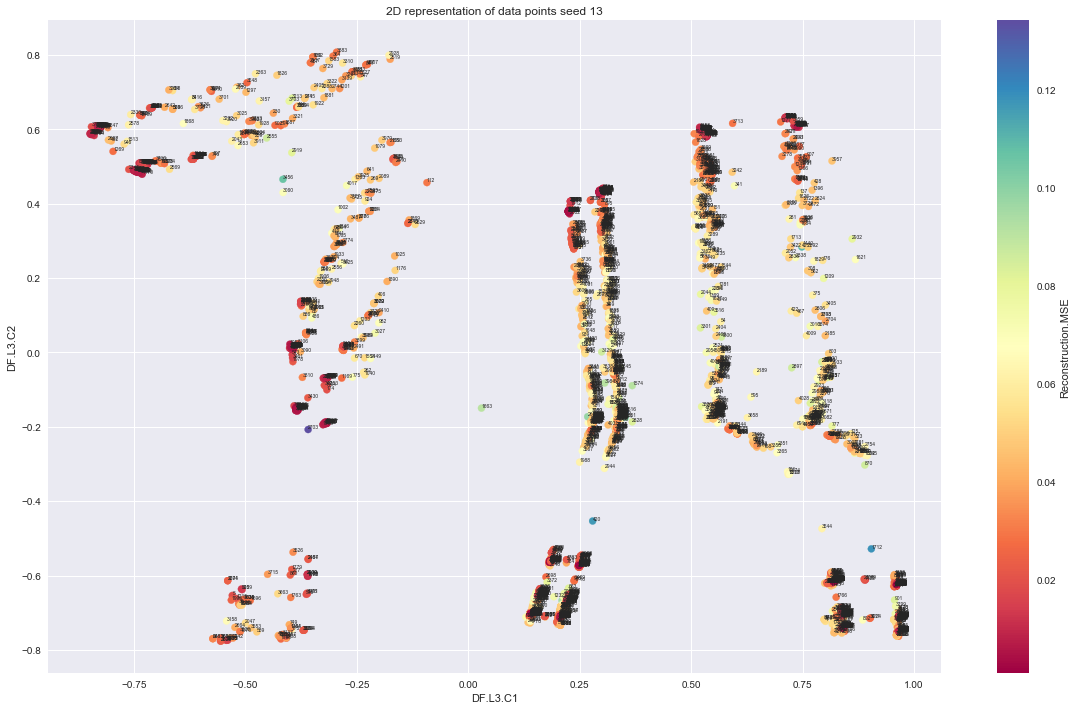

In [99]:
model.train(
    x=X_train_0.names,
    training_frame=X_train_0
)

recon_error = model.anomaly(X_test)

plot_bidimensional(model, X_test, recon_error, 2, "2D representation of data points seed {}".format(seed))

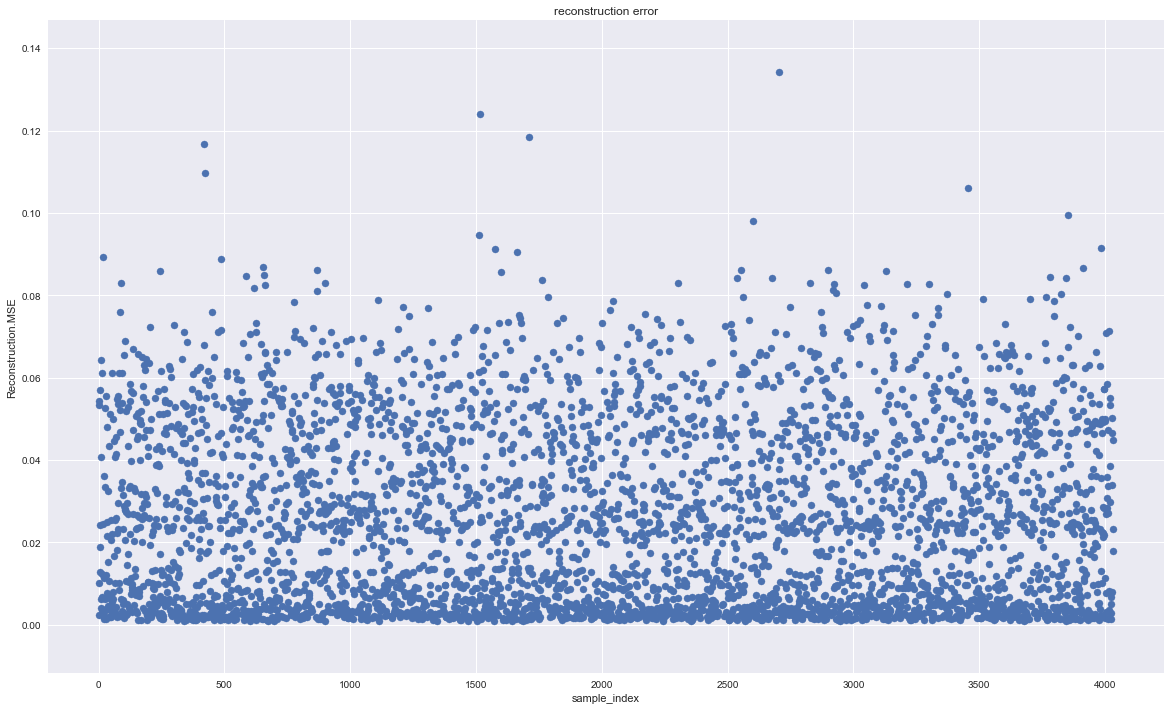

In [100]:
plt.figure()
df=recon_error.as_data_frame(True)
df["sample_index"]=df.index
df.plot(kind="scatter", x="sample_index", y="Reconstruction.MSE", 
        title = "reconstruction error", s = 50)


In [105]:
threshold = 0.025
df["predicted_class"] = (df["Reconstruction.MSE"] > threshold).astype('int')
predicted_classes = df["predicted_class"].values
print("F1: " + str(100*f1_score(real_classes, predicted_classes)))

F1: 44.6342369105


In [106]:
df["real_class"] = real_classes
df

,Reconstruction.MSE,sample_index,predicted_class,real_class
0,0.053308,0,1,1
1,0.054247,1,1,1
2,0.002435,2,0,0
3,0.010170,3,0,1
4,0.012717,4,0,0
5,0.018890,5,0,0
6,0.024349,6,0,0
7,0.057134,7,1,1
8,0.040695,8,1,1
9,0.064336,9,1,0


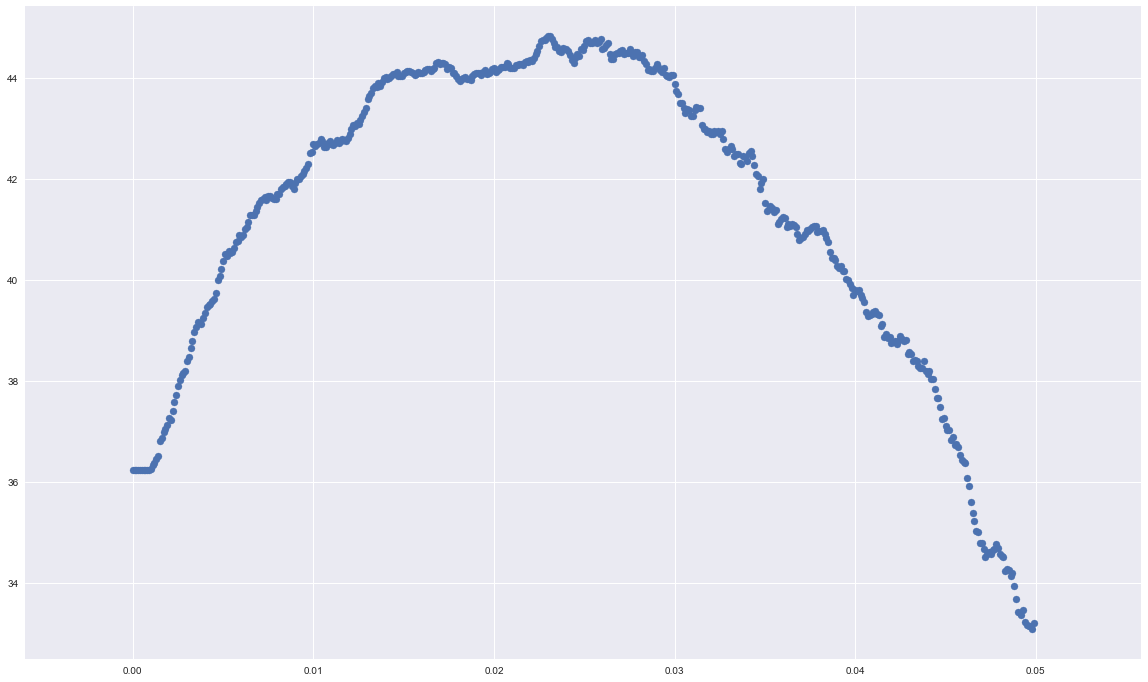

In [103]:
x = np.arange(0, 0.05, 0.0001)
y = []

for threshold in x:
    
    df["predicted_class"] = (df["Reconstruction.MSE"] > threshold).astype('int')
    predicted_classes = df["predicted_class"].values
    y.append(100*f1_score(real_classes, predicted_classes))

plt.scatter(x,y)

deepfeatures progress: |██████████████████████████████████████████████████| 100%


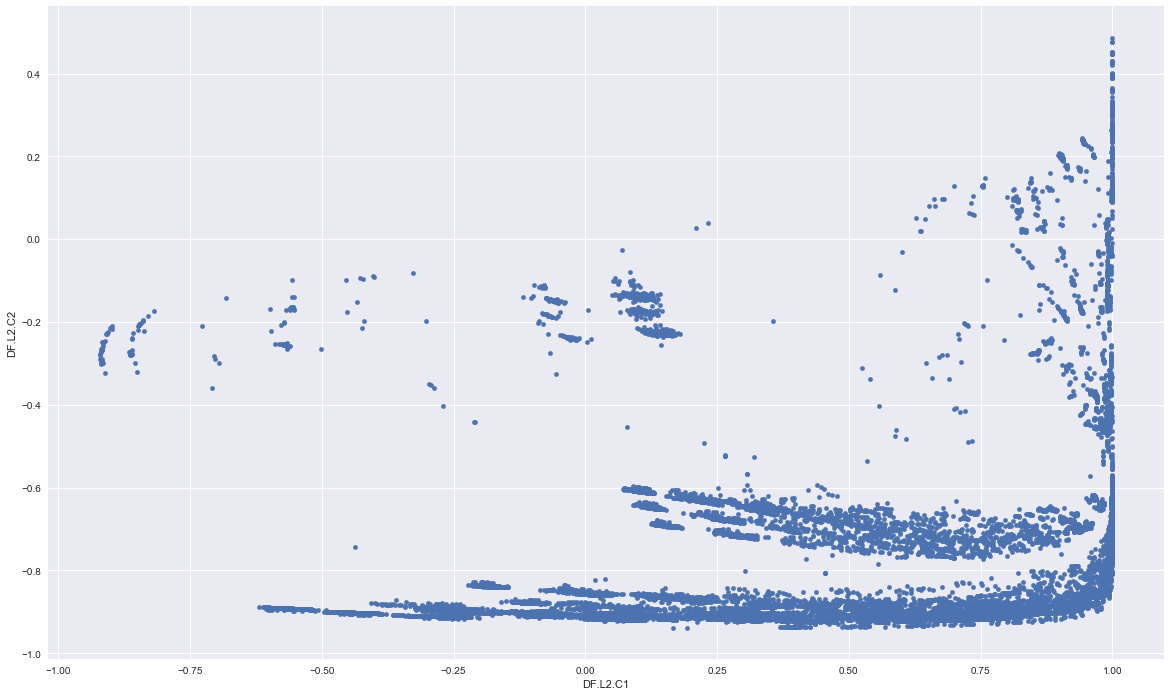

In [85]:
model.deepfeatures(X_train, 1).as_data_frame().plot(kind='scatter', x='DF.L2.C1', y='DF.L2.C2')

Anomaly detection using compressed representation

In [ ]:
for seed in range(1, 8):
    model = H2OAutoEncoderEstimator(
        activation="Tanh",
        hidden=[8, 4, 2, 4, 8],
        epochs=100,
        #sparse=True,
        #l1=1e-5,
        seed=seed,
        reproducible=True)
    model.train(
    x=X_train_0.names,
    training_frame=X_train_0)

    recon_error = model.anomaly(X_test)
    plot_bidimensional(model, X_test, recon_error, 2, "2D representation of data points seed {}".format(seed))
    # compute average and variance of the 2 dimensions


In [ ]:
model = H2OAutoEncoderEstimator(
        activation="Tanh",
        hidden=[50,20, 2, 20, 50],
        epochs=100,
        #sparse=True,
        #l1=1e-5,
        seed=1,
        reproducible=True)
model.train(
    x=X_train_0.names,
    training_frame=X_train_0
)

recon_error = model.anomaly(X_test)
bidimensional_data = model.deepfeatures(X_test, 2).cbind(recon_error).as_data_frame()
bidimensional_data